In [75]:
from sklearn.datasets import load_iris
from sklearn.feature_selection import SelectKBest, chi2

iris=load_iris()
X, y = iris.data, iris.target
chiValues = chi2(X, y)
X_new = SelectKBest(chi2, k=2).fit_transform(X, y)

print(X.shape)
print(X_new.shape)


from sklearn.preprocessing import StandardScaler
print(StandardScaler().fit_transform(iris.data))

from sklearn.preprocessing import MinMaxScaler
print(MinMaxScaler().fit_transform(iris.data))

from sklearn.preprocessing import Normalizer
print(Normalizer().fit_transform(iris.data))

from sklearn.preprocessing import Binarizer
print(Binarizer().fit_transform(iris.data))

from sklearn.preprocessing import OneHotEncoder
print(OneHotEncoder(categories='auto').fit_transform(iris.target.reshape((0-1,1))))

from numpy import vstack, array, nan
from sklearn.impute import SimpleImputer
print(SimpleImputer().fit_transform(vstack((array([nan, nan, nan, nan]), iris.data))))

from sklearn.preprocessing import PolynomialFeatures
print(PolynomialFeatures().fit_transform(iris.data))

from numpy import log1p
from sklearn.preprocessing import FunctionTransformer
print(FunctionTransformer(log1p, validate=False).fit_transform(iris.data))

from sklearn.feature_selection import VarianceThreshold
print(VarianceThreshold(threshold=3).fit_transform(iris.data))

from sklearn.feature_selection import SelectKBest
from scipy.stats import pearsonr
print(SelectKBest(lambda X, Y: np.array(list(map(lambda x: pearsonr(x, Y), X.T))).T[0], k=2).fit_transform(iris.data, iris.target))

from sklearn.feature_selection import chi2
print(SelectKBest(chi2, k=2).fit_transform(iris.data, iris.target))

from minepy import MINE
def mic(x, y):
    m = MINE()
    m.compute_score(x, y)
    return (m.mic(), 0.5)
print(SelectKBest(lambda x, y: np.array(list(map(lambda x: mic(x, Y), X.T))).T[0], k=2).fit_transform(iris.data, iris.target))

from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

print(RFE(estimator=LogisticRegression(multi_class='auto', solver='lbfgs', max_iter=500), n_features_to_select=2).fit_transform(iris.data, iris.target))

from sklearn.feature_selection import SelectFromModel
print(SelectfromModel(LogisticRegression(penalty='12', C=0.1, solver='lbfgs', multi_class='auto')).fit_transform(iris.data, iris.target))

from sklearn.ensemble import GradientBoostingClassifier
print(SelectFromModel(GradientBoostingClassifier()).fit_transform(iris.data, iris.target))

from sklearn.decomposition import PCA
PCA(n_components=2).fit_transform(iris.data, iris.target)

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
LDA(n_components=2).fit_transform(iris.data, iris.target)




(150, 4)
(150, 2)
[[-9.00681170e-01  1.01900435e+00 -1.34022653e+00 -1.31544430e+00]
 [-1.14301691e+00 -1.31979479e-01 -1.34022653e+00 -1.31544430e+00]
 [-1.38535265e+00  3.28414053e-01 -1.39706395e+00 -1.31544430e+00]
 [-1.50652052e+00  9.82172869e-02 -1.28338910e+00 -1.31544430e+00]
 [-1.02184904e+00  1.24920112e+00 -1.34022653e+00 -1.31544430e+00]
 [-5.37177559e-01  1.93979142e+00 -1.16971425e+00 -1.05217993e+00]
 [-1.50652052e+00  7.88807586e-01 -1.34022653e+00 -1.18381211e+00]
 [-1.02184904e+00  7.88807586e-01 -1.28338910e+00 -1.31544430e+00]
 [-1.74885626e+00 -3.62176246e-01 -1.34022653e+00 -1.31544430e+00]
 [-1.14301691e+00  9.82172869e-02 -1.28338910e+00 -1.44707648e+00]
 [-5.37177559e-01  1.47939788e+00 -1.28338910e+00 -1.31544430e+00]
 [-1.26418478e+00  7.88807586e-01 -1.22655167e+00 -1.31544430e+00]
 [-1.26418478e+00 -1.31979479e-01 -1.34022653e+00 -1.44707648e+00]
 [-1.87002413e+00 -1.31979479e-01 -1.51073881e+00 -1.44707648e+00]
 [-5.25060772e-02  2.16998818e+00 -1.4539013

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

import warnings
warnings.filterwarnings("ignore")
%matplotlib inline


In [86]:
train_data_file = './zhengqi_train.txt'
test_data_file = './zhengqi_test.txt'

train_data = pd.read_csv(train_data_file, sep='\t', encoding='utf-8')
test_data = pd.read_csv(test_data_file, sep='\t', encoding='utf-8')
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2888 entries, 0 to 2887
Data columns (total 39 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   V0      2888 non-null   float64
 1   V1      2888 non-null   float64
 2   V2      2888 non-null   float64
 3   V3      2888 non-null   float64
 4   V4      2888 non-null   float64
 5   V5      2888 non-null   float64
 6   V6      2888 non-null   float64
 7   V7      2888 non-null   float64
 8   V8      2888 non-null   float64
 9   V9      2888 non-null   float64
 10  V10     2888 non-null   float64
 11  V11     2888 non-null   float64
 12  V12     2888 non-null   float64
 13  V13     2888 non-null   float64
 14  V14     2888 non-null   float64
 15  V15     2888 non-null   float64
 16  V16     2888 non-null   float64
 17  V17     2888 non-null   float64
 18  V18     2888 non-null   float64
 19  V19     2888 non-null   float64
 20  V20     2888 non-null   float64
 21  V21     2888 non-null   float64
 22  

In [4]:
train_data.describe()

V0           V1           V2           V3           V4  \
count  2888.000000  2888.000000  2888.000000  2888.000000  2888.000000   
mean      0.123048     0.056068     0.289720    -0.067790     0.012921   
std       0.928031     0.941515     0.911236     0.970298     0.888377   
min      -4.335000    -5.122000    -3.420000    -3.956000    -4.742000   
25%      -0.297000    -0.226250    -0.313000    -0.652250    -0.385000   
50%       0.359000     0.272500     0.386000    -0.044500     0.110000   
75%       0.726000     0.599000     0.918250     0.624000     0.550250   
max       2.121000     1.918000     2.828000     2.457000     2.689000   

                V5           V6           V7           V8           V9  ...  \
count  2888.000000  2888.000000  2888.000000  2888.000000  2888.000000  ...   
mean     -0.558565     0.182892     0.116155     0.177856    -0.169452  ...   
std       0.517957     0.918054     0.955116     0.895444     0.953813  ...   
min      -2.182000    -4.576000    -5.048000    -4.692000   -12.891000  ...   
25%      -0.853000    -0.310000    -0.295000    -0.159000    -0.390000  ...   
50%      -0.466000     0.388000     0.344000     0.362000     0.042000  ...   
75%      -0.154000     0.831250     0.782250     0.726000     0.042000  ...   
max       0.489000     1.895000     1.918000     2.245000     1.335000  ...   

               V29          V30          V31          V32          V33  \
count  2888.000000  2888.000000  2888.000000  2888.000000  2888.000000   
mean      0.097648     0.055477     0.127791     0.020806     0.007801   
std       1.061200     0.901934     0.873028     0.902584     1.006995   
min      -2.912000    -4.507000    -5.859000    -4.053000    -4.627000   
25%      -0.664000    -0.283000    -0.170250    -0.407250    -0.499000   
50%      -0.023000     0.053500     0.299500     0.039000    -0.040000   
75%       0.745250     0.488000     0.635000     0.557000     0.462000   
max       4.580000     2.689000     2.013000     2.395000     5.465000   

               V34          V35          V36          V37       target  
count  2888.000000  2888.000000  2888.000000  2888.000000  2888.000000  
mean      0.006715     0.197764     0.030658    -0.130330     0.126353  
std       1.003291     0.985675     0.970812     1.017196     0.983966  
min      -4.789000    -5.695000    -2.608000    -3.630000    -3.044000  
25%      -0.290000    -0.202500    -0.413000    -0.798250    -0.350250  
50%       0.160000     0.364000     0.137000    -0.185500     0.313000  
75%       0.273000     0.602000     0.644250     0.495250     0.793250  
max       5.110000     2.324000     5.238000     3.000000     2.538000  

[8 rows x 39 columns]

In [6]:
test_data.describe()

V0           V1           V2           V3           V4  \
count  1925.000000  1925.000000  1925.000000  1925.000000  1925.000000   
mean     -0.184404    -0.083912    -0.434762     0.101671    -0.019172   
std       1.073333     1.076670     0.969541     1.034925     1.147286   
min      -4.814000    -5.488000    -4.283000    -3.276000    -4.921000   
25%      -0.664000    -0.451000    -0.978000    -0.644000    -0.497000   
50%       0.065000     0.195000    -0.267000     0.220000     0.118000   
75%       0.549000     0.589000     0.278000     0.793000     0.610000   
max       2.100000     2.120000     1.946000     2.603000     4.475000   

                V5           V6           V7           V8           V9  ...  \
count  1925.000000  1925.000000  1925.000000  1925.000000  1925.000000  ...   
mean      0.838049    -0.274092    -0.173971    -0.266709     0.255114  ...   
std       0.963043     1.054119     1.040101     1.085916     1.014394  ...   
min      -1.168000    -5.649000    -5.625000    -6.059000    -6.784000  ...   
25%       0.122000    -0.732000    -0.509000    -0.775000    -0.390000  ...   
50%       0.437000    -0.082000     0.018000    -0.004000     0.401000  ...   
75%       1.928000     0.457000     0.515000     0.482000     0.904000  ...   
max       3.176000     1.528000     1.394000     2.408000     1.766000  ...   

               V28          V29          V30          V31          V32  \
count  1925.000000  1925.000000  1925.000000  1925.000000  1925.000000   
mean     -0.206871    -0.146463    -0.083215    -0.191729    -0.030782   
std       1.064140     0.880593     1.126414     1.138454     1.130228   
min      -2.435000    -2.413000    -4.507000    -7.698000    -4.057000   
25%      -0.453000    -0.818000    -0.339000    -0.476000    -0.472000   
50%      -0.445000    -0.199000     0.010000     0.100000     0.155000   
75%      -0.434000     0.468000     0.447000     0.471000     0.627000   
max       4.656000     3.022000     3.139000     1.428000     2.299000   

               V33          V34          V35          V36          V37  
count  1925.000000  1925.000000  1925.000000  1925.000000  1925.000000  
mean     -0.011433    -0.009985    -0.296895    -0.046270     0.195735  
std       0.989732     0.995213     0.946896     1.040854     0.940599  
min      -4.627000    -4.789000    -7.477000    -2.608000    -3.346000  
25%      -0.460000    -0.290000    -0.349000    -0.593000    -0.432000  
50%      -0.040000     0.160000    -0.270000     0.083000     0.152000  
75%       0.419000     0.273000     0.364000     0.651000     0.797000  
max       5.465000     5.110000     1.671000     2.861000     3.021000  

[8 rows x 38 columns]

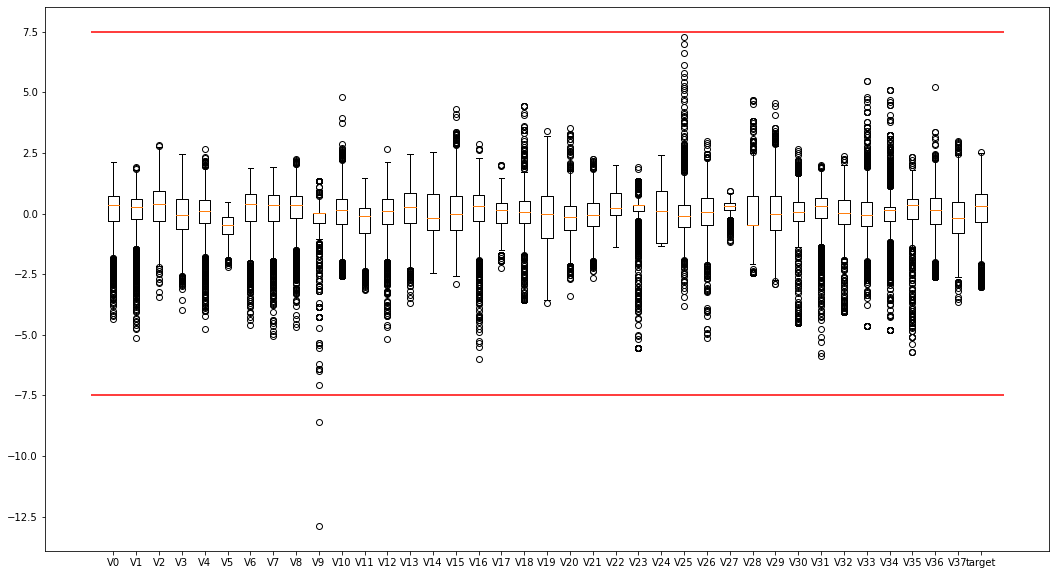

In [93]:
plt.figure(figsize=(18, 10))
plt.boxplot(x=train_data.values, labels=train_data.columns)
plt.hlines([-7.5, 7.5], 0, 40, colors='r')
plt.show()

In [96]:
train_data = train_data[train_data['V9']>-7.5]
test_data = test_data[test_data['V9']>-7.5]

display(train_data)
display(test_data)

V0     V1     V2     V3     V4  ...    V34    V35    V36    V37  \
0     0.566  0.016 -0.143  0.407  0.452  ... -4.789 -5.101 -2.608 -3.508   
1     0.968  0.437  0.066  0.566  0.194  ...  0.160  0.364 -0.335 -0.730   
2     1.013  0.568  0.235  0.370  0.112  ...  0.160  0.364  0.765 -0.589   
3     0.733  0.368  0.283  0.165  0.599  ... -0.065  0.364  0.333 -0.112   
4     0.684  0.638  0.260  0.209  0.337  ... -0.215  0.364 -0.280 -0.028   
...     ...    ...    ...    ...    ...  ...    ...    ...    ...    ...   
2883  0.190 -0.025 -0.138  0.161  0.600  ... -0.027 -0.349  0.576  0.686   
2884  0.507  0.557  0.296  0.183  0.530  ...  0.498 -0.349 -0.615 -0.380   
2885 -0.394 -0.721 -0.485  0.084  0.136  ...  0.498 -0.349  0.951  0.748   
2886 -0.219 -0.282 -0.344 -0.049  0.449  ...  0.610 -0.230 -0.301  0.555   
2887  0.368  0.380 -0.225 -0.049  0.379  ... -0.009 -0.190 -0.567  0.388   

      target  
0      0.175  
1      0.676  
2      0.633  
3      0.206  
4      0.384  
...      ...  
2883   0.235  
2884   1.042  
2885   0.005  
2886   0.350  
2887   0.417  

[2886 rows x 39 columns]

V0     V1     V2     V3     V4  ...    V33    V34    V35    V36  \
0     0.368  0.380 -0.225 -0.049  0.379  ...  0.534 -0.009 -0.190 -0.567   
1     0.148  0.489 -0.247 -0.049  0.122  ...  0.046 -0.220  0.008 -0.294   
2    -0.166 -0.062 -0.311  0.046 -0.055  ...  0.017 -0.234  0.008  0.373   
3     0.102  0.294 -0.259  0.051 -0.183  ... -0.040 -0.290  0.008 -0.666   
4     0.300  0.428  0.208  0.051 -0.033  ... -0.040 -0.290  0.008 -0.140   
...     ...    ...    ...    ...    ...  ...    ...    ...    ...    ...   
1920 -1.362 -1.553 -3.096 -0.444  0.381  ... -1.187 -0.852 -2.131 -2.564   
1921 -2.698 -3.452 -3.620 -1.066 -1.385  ... -1.187 -0.852 -2.131 -2.564   
1922 -2.615 -3.564 -3.402 -0.422 -1.272  ... -1.851 -1.548 -1.537 -2.544   
1923 -2.661 -3.646 -3.271 -0.699 -1.270  ... -1.645 -1.471 -1.537 -2.549   
1924 -2.321 -3.037 -3.214 -1.594 -0.910  ... -1.703 -1.471 -1.537 -1.123   

        V37  
0     0.388  
1     0.104  
2     0.569  
3     0.391  
4    -0.497  
...     ...  
1920  0.597  
1921  1.215  
1922  1.612  
1923  1.431  
1924  1.988  

[1925 rows x 38 columns]

<AxesSubplot:xlabel='V0'>

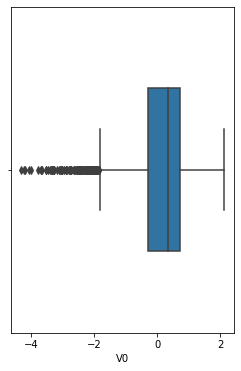

In [13]:
fig = plt.figure(figsize=(4, 6))
sns.boxplot(train_data['V0'], orient='v', width=0.5)

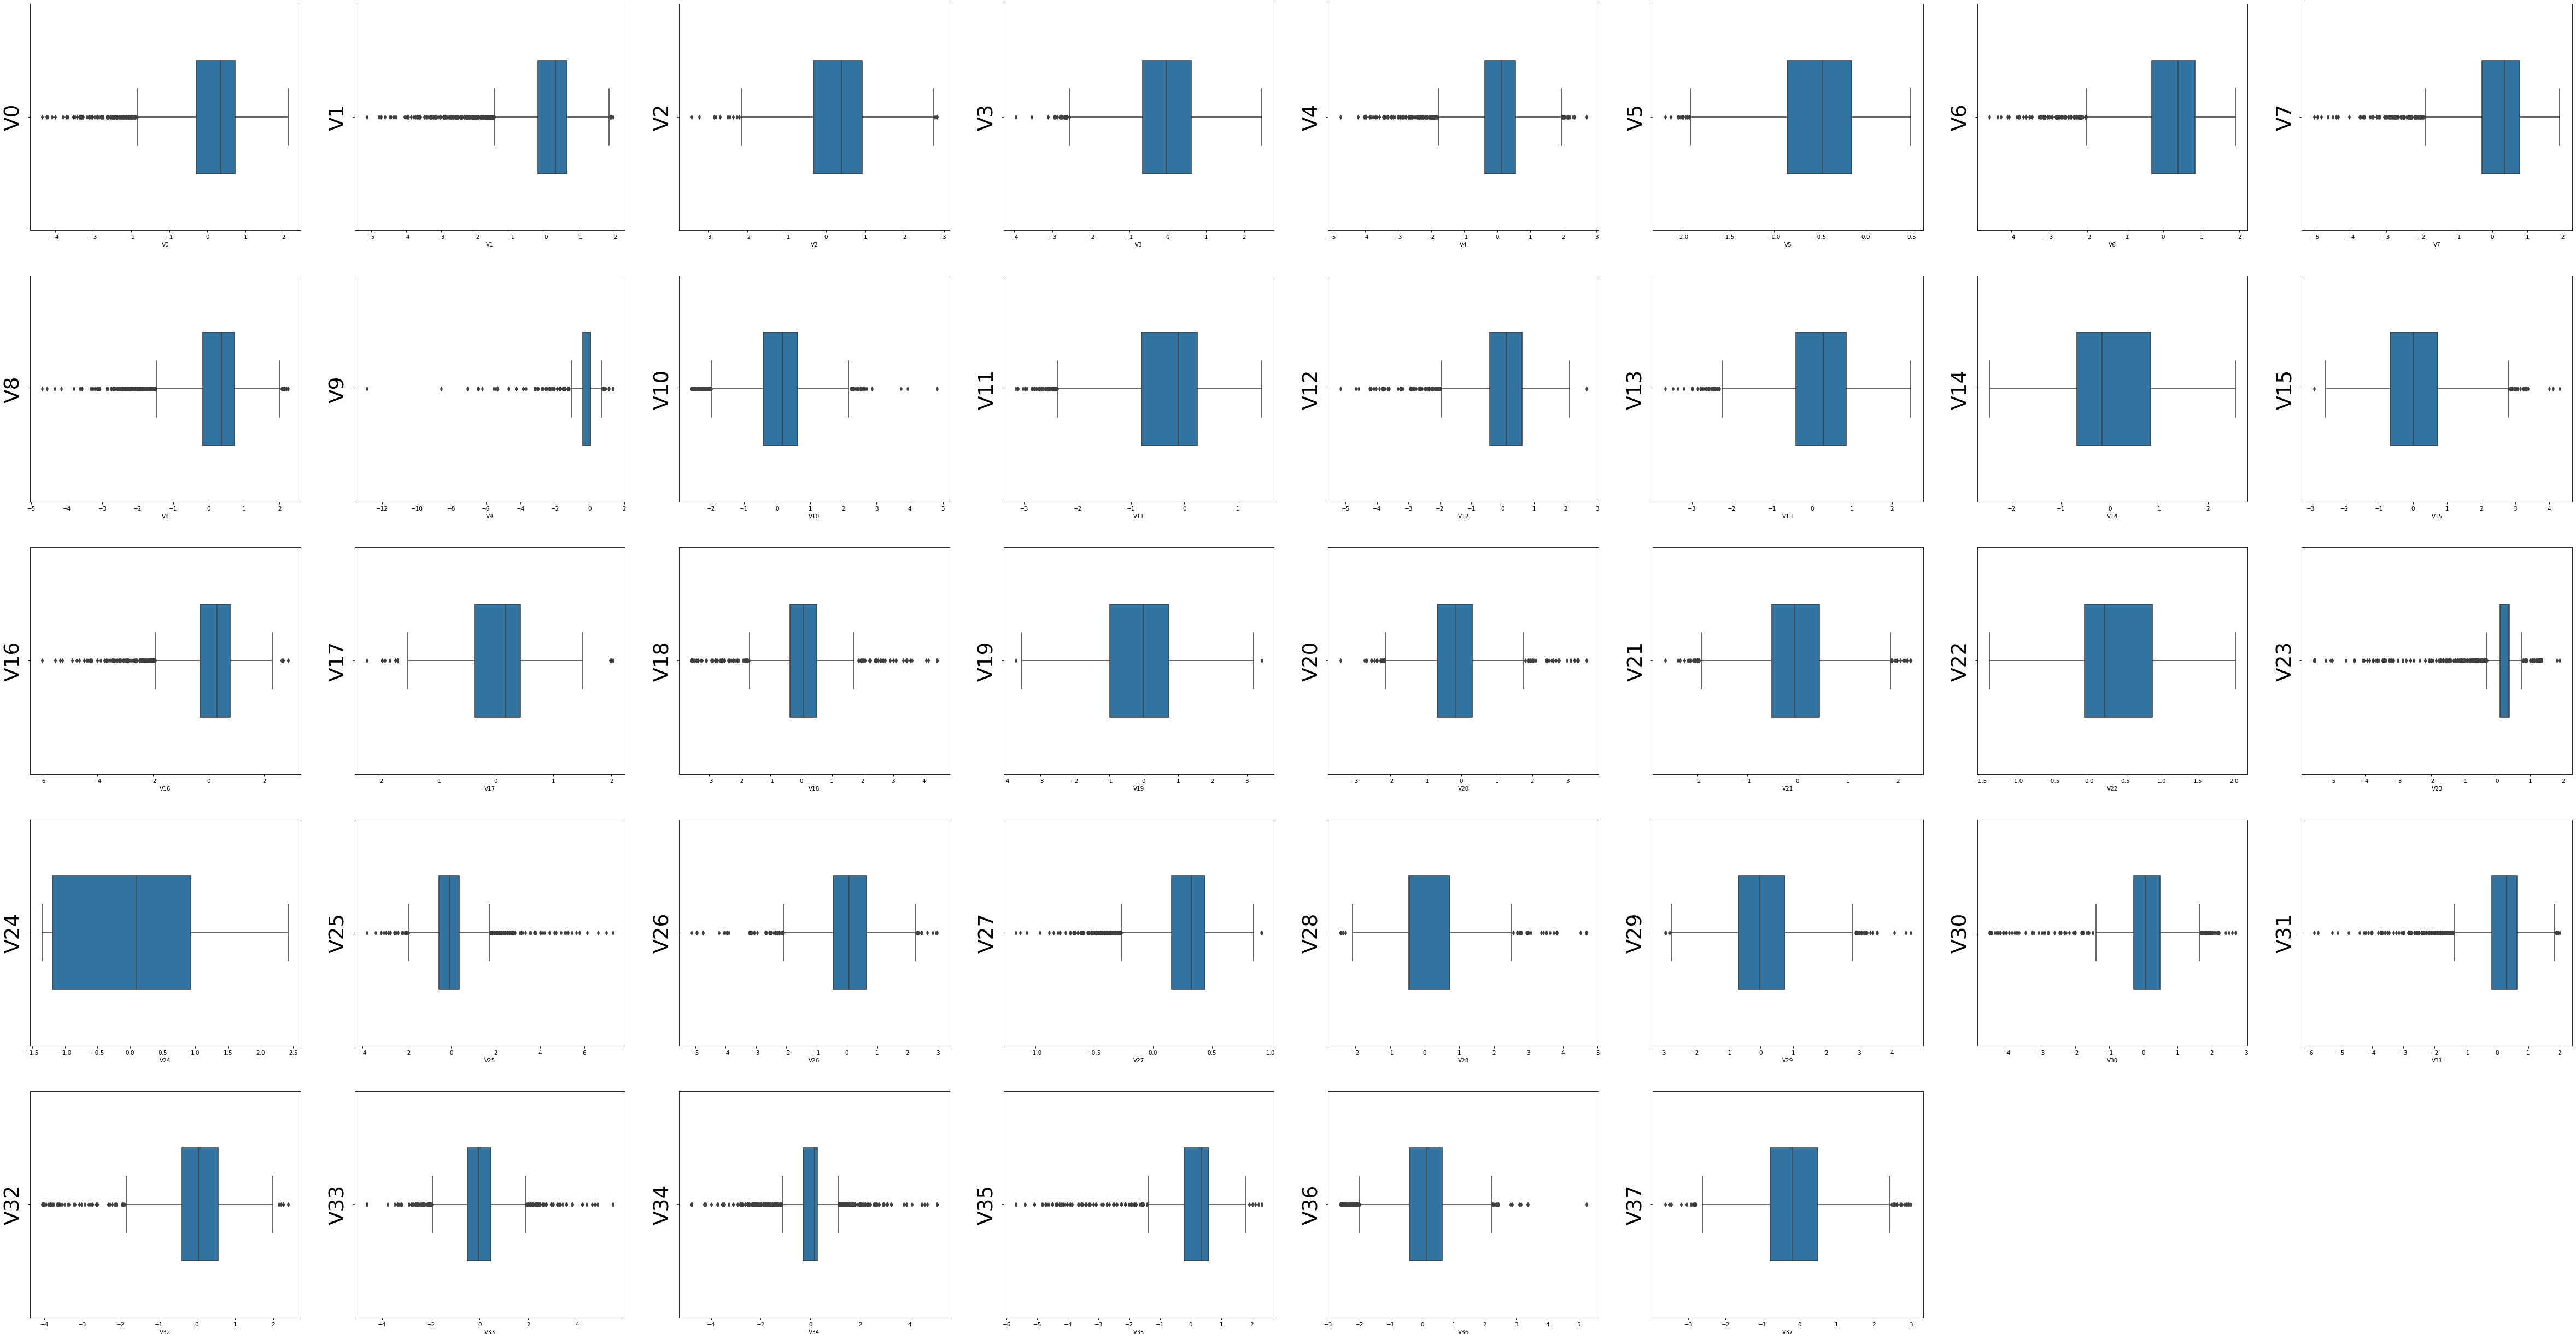

In [15]:
column = train_data.columns.tolist()[:39]
fig = plt.figure(figsize=(80, 60), dpi=75)
for i in range(38):
    plt.subplot(7, 8, i+1)
    sns.boxplot(train_data[column[i]], orient="v", width=0.5)
    plt.ylabel(column[i], fontsize=36)
plt.show()

In [23]:
def find_outliers(model, X, y, sigma=3):
    try:
        y_pred = pd.Series(model.predict(X), index=y.index)
    except:
        model.fit(X, y)
        y_pred = pd.Series(model.predict(X), index=y.index)
    
    resid = y - y_pred
    mean_resid = resid.mean()
    std_resid = resid.std()
    
    z = (resid - mean_resid) / std_resid
    outliers = z[abs(z)>sigma].index
    
    print("R2=", model.score(X, y))
    print("MSE=", mean_squared_error(y, y_pred))
    print("--------------------------------------------")
    
    print("mean of residuals:", mean_resid)
    print("std of residuals:", std_resid)
    print("--------------------------------------------")
    
    print(len(outliers), 'outliers:')
    print(outliers.tolist())
    
    plt.figure(figsize=(15, 5))
    ax_131 = plt.subplot(1, 3, 1)
    plt.plot(y, y_pred, '.')
    plt.plot(y.loc[outliers], y_pred.loc[outliers], 'ro')
    plt.legend(['Accepted', 'Outliers'])
    plt.xlabel('y')
    plt.ylabel('y_pred')
    
    ax_132 = plt.subplot(1, 3, 2)
    plt.plot(y, y-y_pred, '.')
    plt.plot(y.loc[outliers], y[outliers]-y_pred.loc[outliers], 'ro')
    plt.legend(['Accept', 'Outliers'])
    plt.xlabel('y')
    plt.ylabel('y - y_pred')
    
    ax_133 = plt.subplot(1, 3, 3)
    z.plot.hist(bins=50, ax=ax_133)
    z.loc[outliers].plot.hist(color='r', bins=50, ax=ax_133)
    plt.legend(['Accept', 'Outliers'])
    plt.xlabel('z')
    plt.savefig('outliers.png')
    
    return outliers
    

R2= 0.8890858938210386
MSE= 0.10734857773123632
--------------------------------------------
mean of residuals: 1.3397254988984316e-17
std of residuals: 0.3276976673193501
--------------------------------------------
31 outliers:
[321, 348, 376, 777, 884, 1145, 1164, 1310, 1458, 1466, 1484, 1523, 1704, 1874, 1879, 1979, 2002, 2279, 2528, 2620, 2645, 2647, 2667, 2668, 2669, 2696, 2767, 2769, 2807, 2842, 2863]


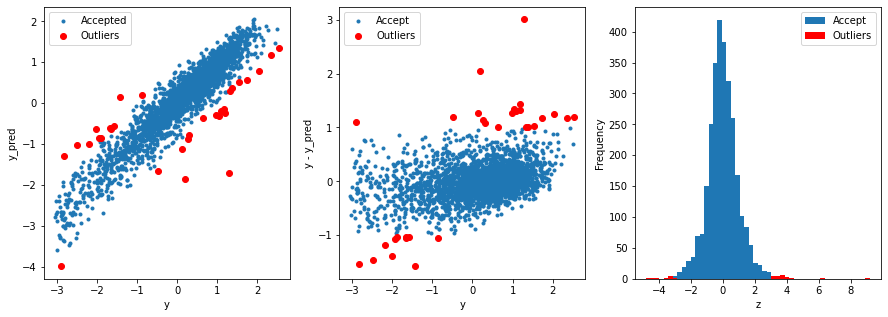

In [24]:
#通过岭回归模型找出异常值，并绘制其分布
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error
X_train = train_data.iloc[:, 0:-1]
y_train = train_data.iloc[:, -1]
outliers = find_outliers(Ridge(), X_train, y_train)

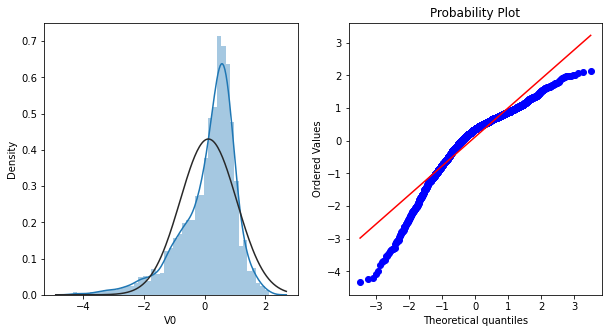

In [25]:
plt.figure(figsize=(10, 5))
ax = plt.subplot(1, 2, 1)
sns.distplot(train_data['V0'], fit=stats.norm)
ax = plt.subplot(1, 2, 2)
res = stats.probplot(train_data['V0'], plot=plt)

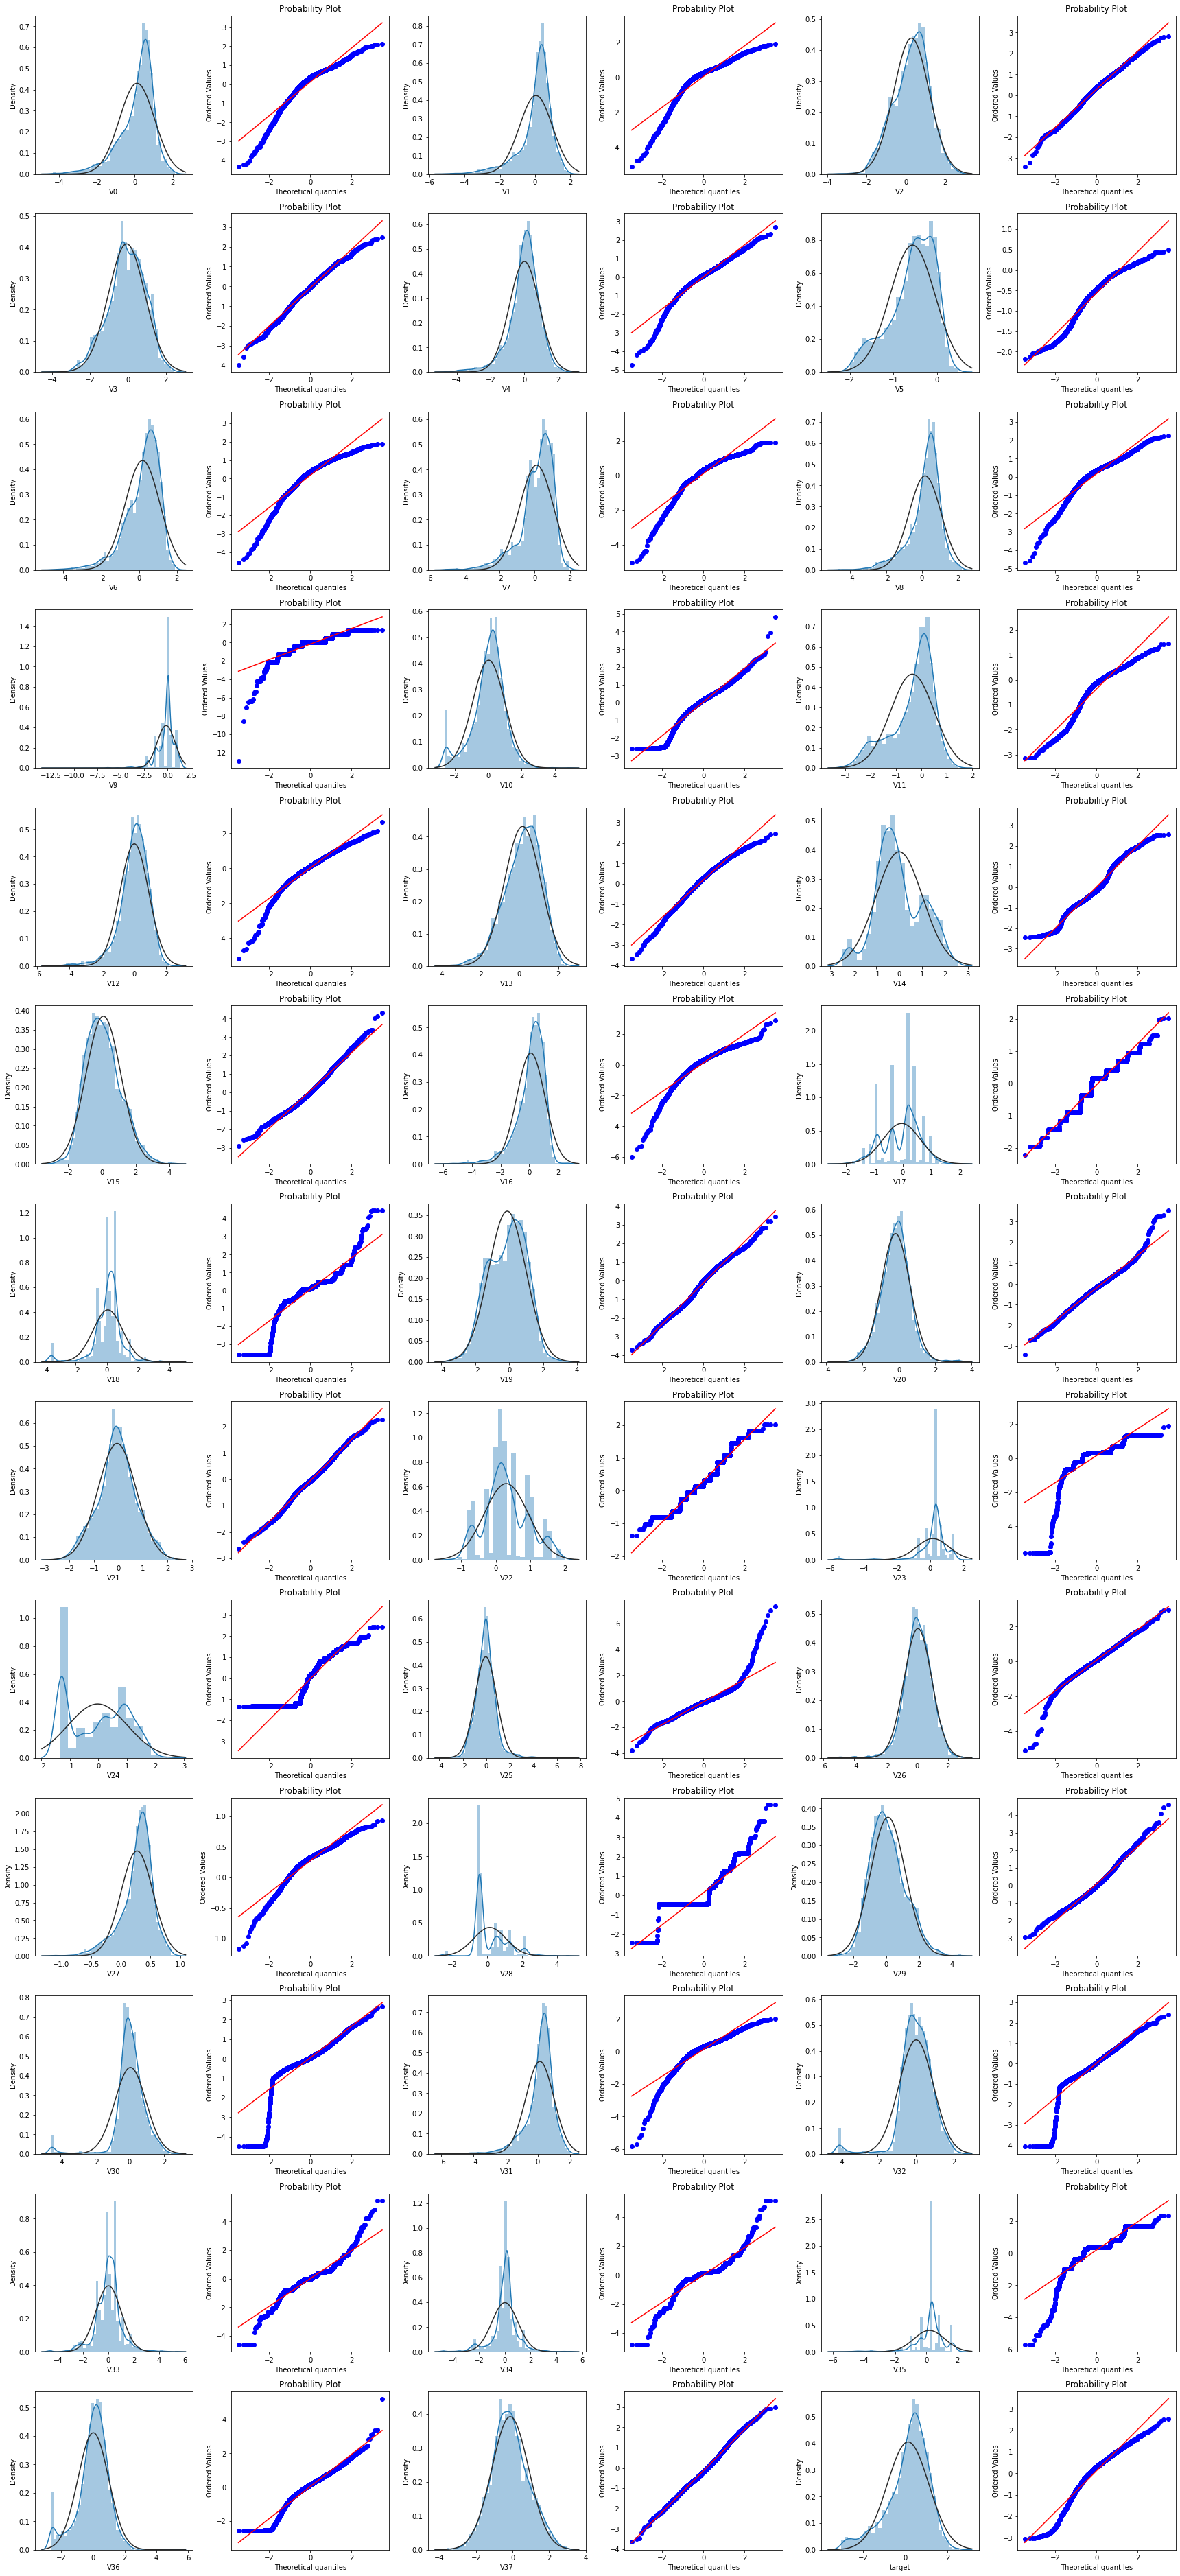

In [27]:
train_cols = 6
train_rows = len(train_data.columns)
plt.figure(figsize=(4*train_cols, 4*train_rows))

i = 0
for col in train_data.columns:
    i += 1
    ax = plt.subplot(train_rows, train_cols, i)
    sns.distplot(train_data[col], fit=stats.norm)
    
    i += 1
    ax = plt.subplot(train_rows, train_cols, i)
    res = stats.probplot(train_data[col], plot=plt)

plt.tight_layout()
plt.show()

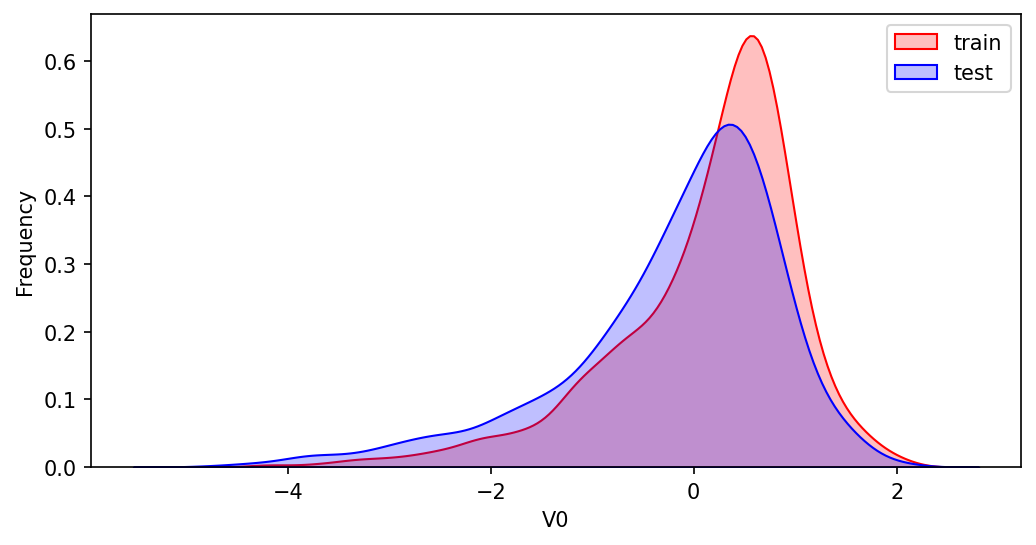

In [28]:
plt.figure(figsize=(8, 4), dpi=150)
ax = sns.kdeplot(train_data['V0'], color="Red", shade=True)
ax = sns.kdeplot(test_data['V0'], color='Blue', shade=True)
ax.set_xlabel('V0')
ax.set_ylabel('Frequency')
ax.legend(["train", "test"])

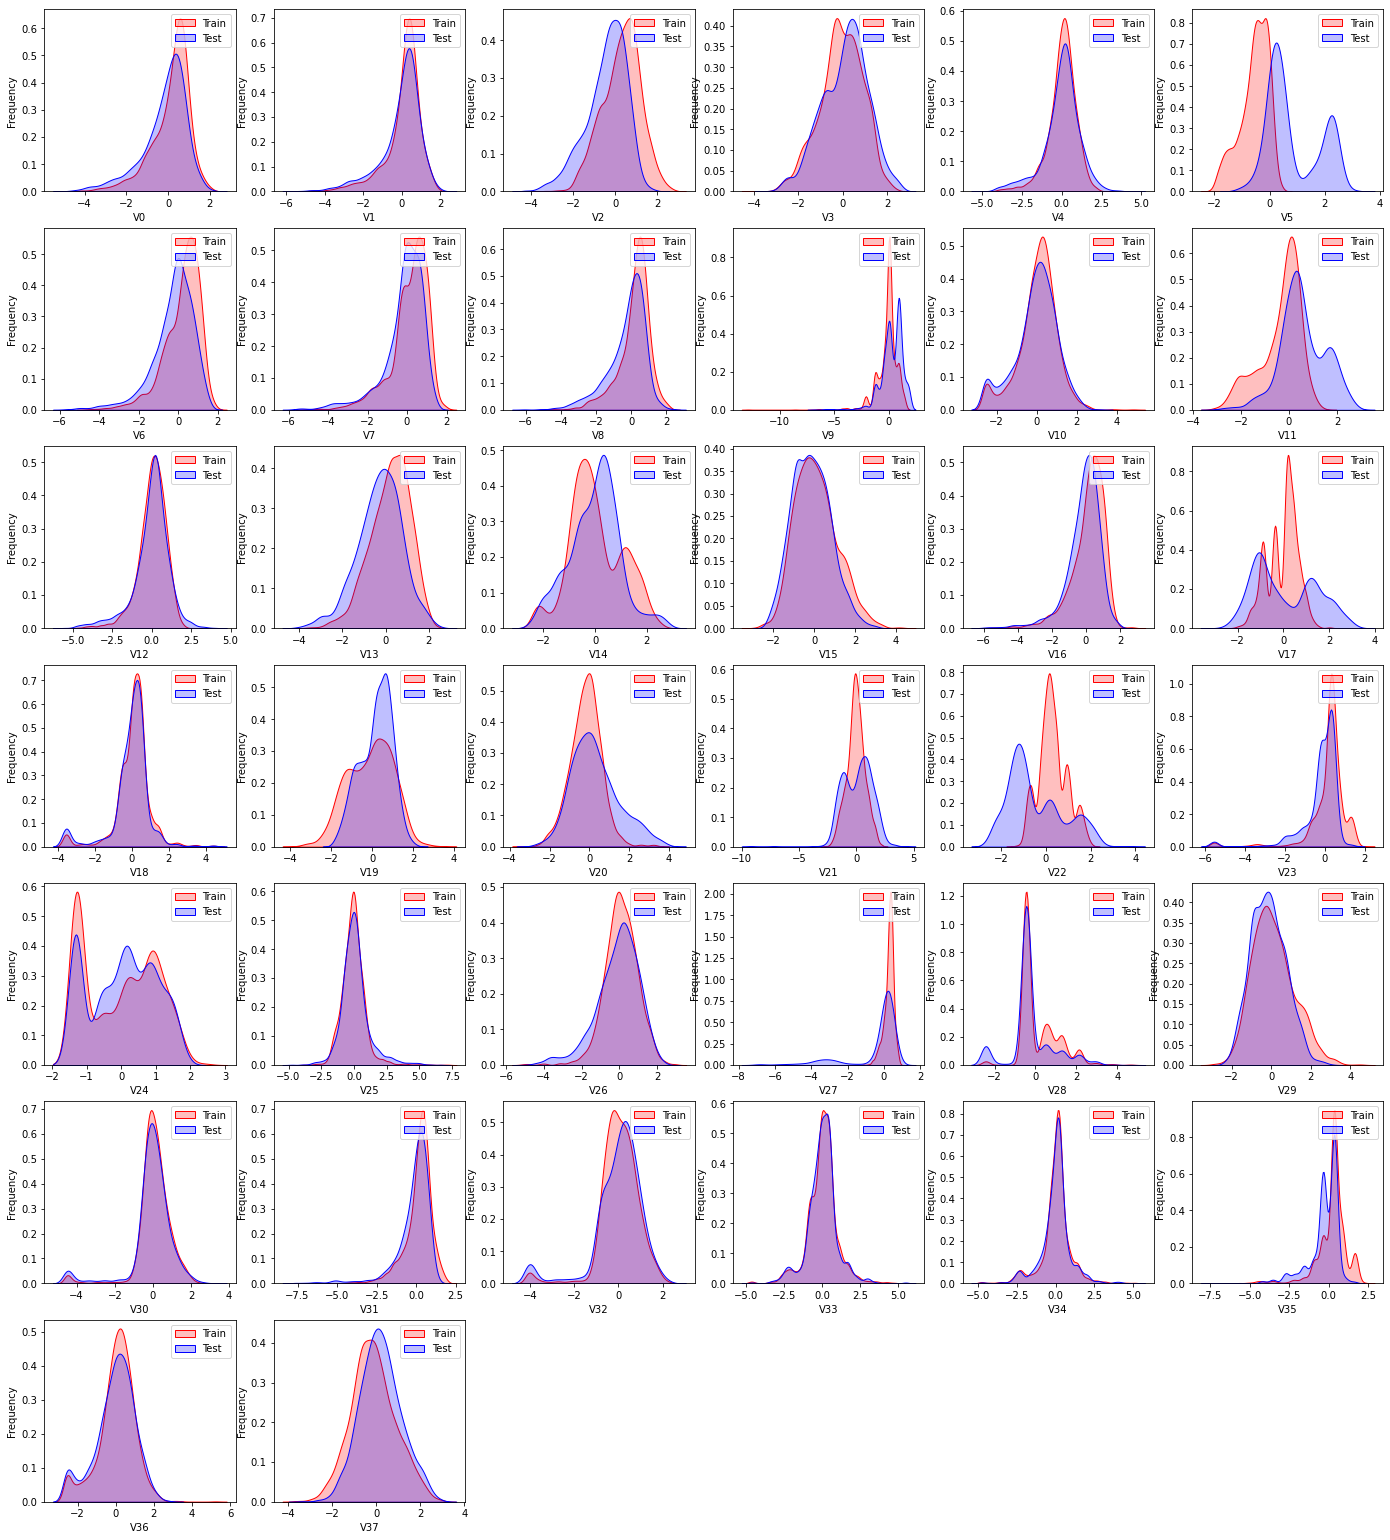

In [31]:
dist_cols = 6
dist_rows = len(test_data.columns)
plt.figure(figsize=(4 * dist_cols, 4 * dist_rows))
i = 1
for col in test_data.columns:
    ax = plt.subplot(dist_rows, dist_cols, i)
    ax = sns.kdeplot(train_data[col], color="Red", shade=True)
    ax = sns.kdeplot(test_data[col], color="Blue", shade=True)
    ax.set_xlabel(col)
    ax.set_ylabel("Frequency")
    ax = ax.legend(["Train", "Test"])
    i += 1
plt.show()

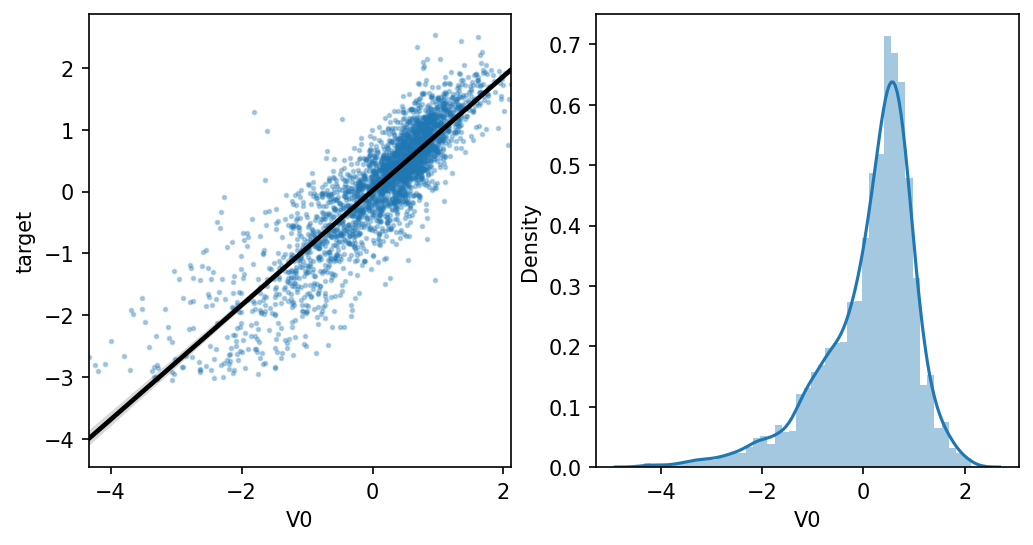

In [33]:
# 线性回归关系图
fcols = 2
frows = 1
plt.figure(figsize = (8, 4), dpi = 150)
ax = plt.subplot(1, 2, 1)
sns.regplot(x='V0', y='target', data=train_data, ax=ax, scatter_kws={'marker':'.', 's':3, 'alpha':0.3}, line_kws={'color':'k'})
plt.xlabel('V0')
plt.ylabel('target')

ax = plt.subplot(1, 2, 2)
sns.distplot(train_data['V0'].dropna())
plt.xlabel('V0')
plt.show()

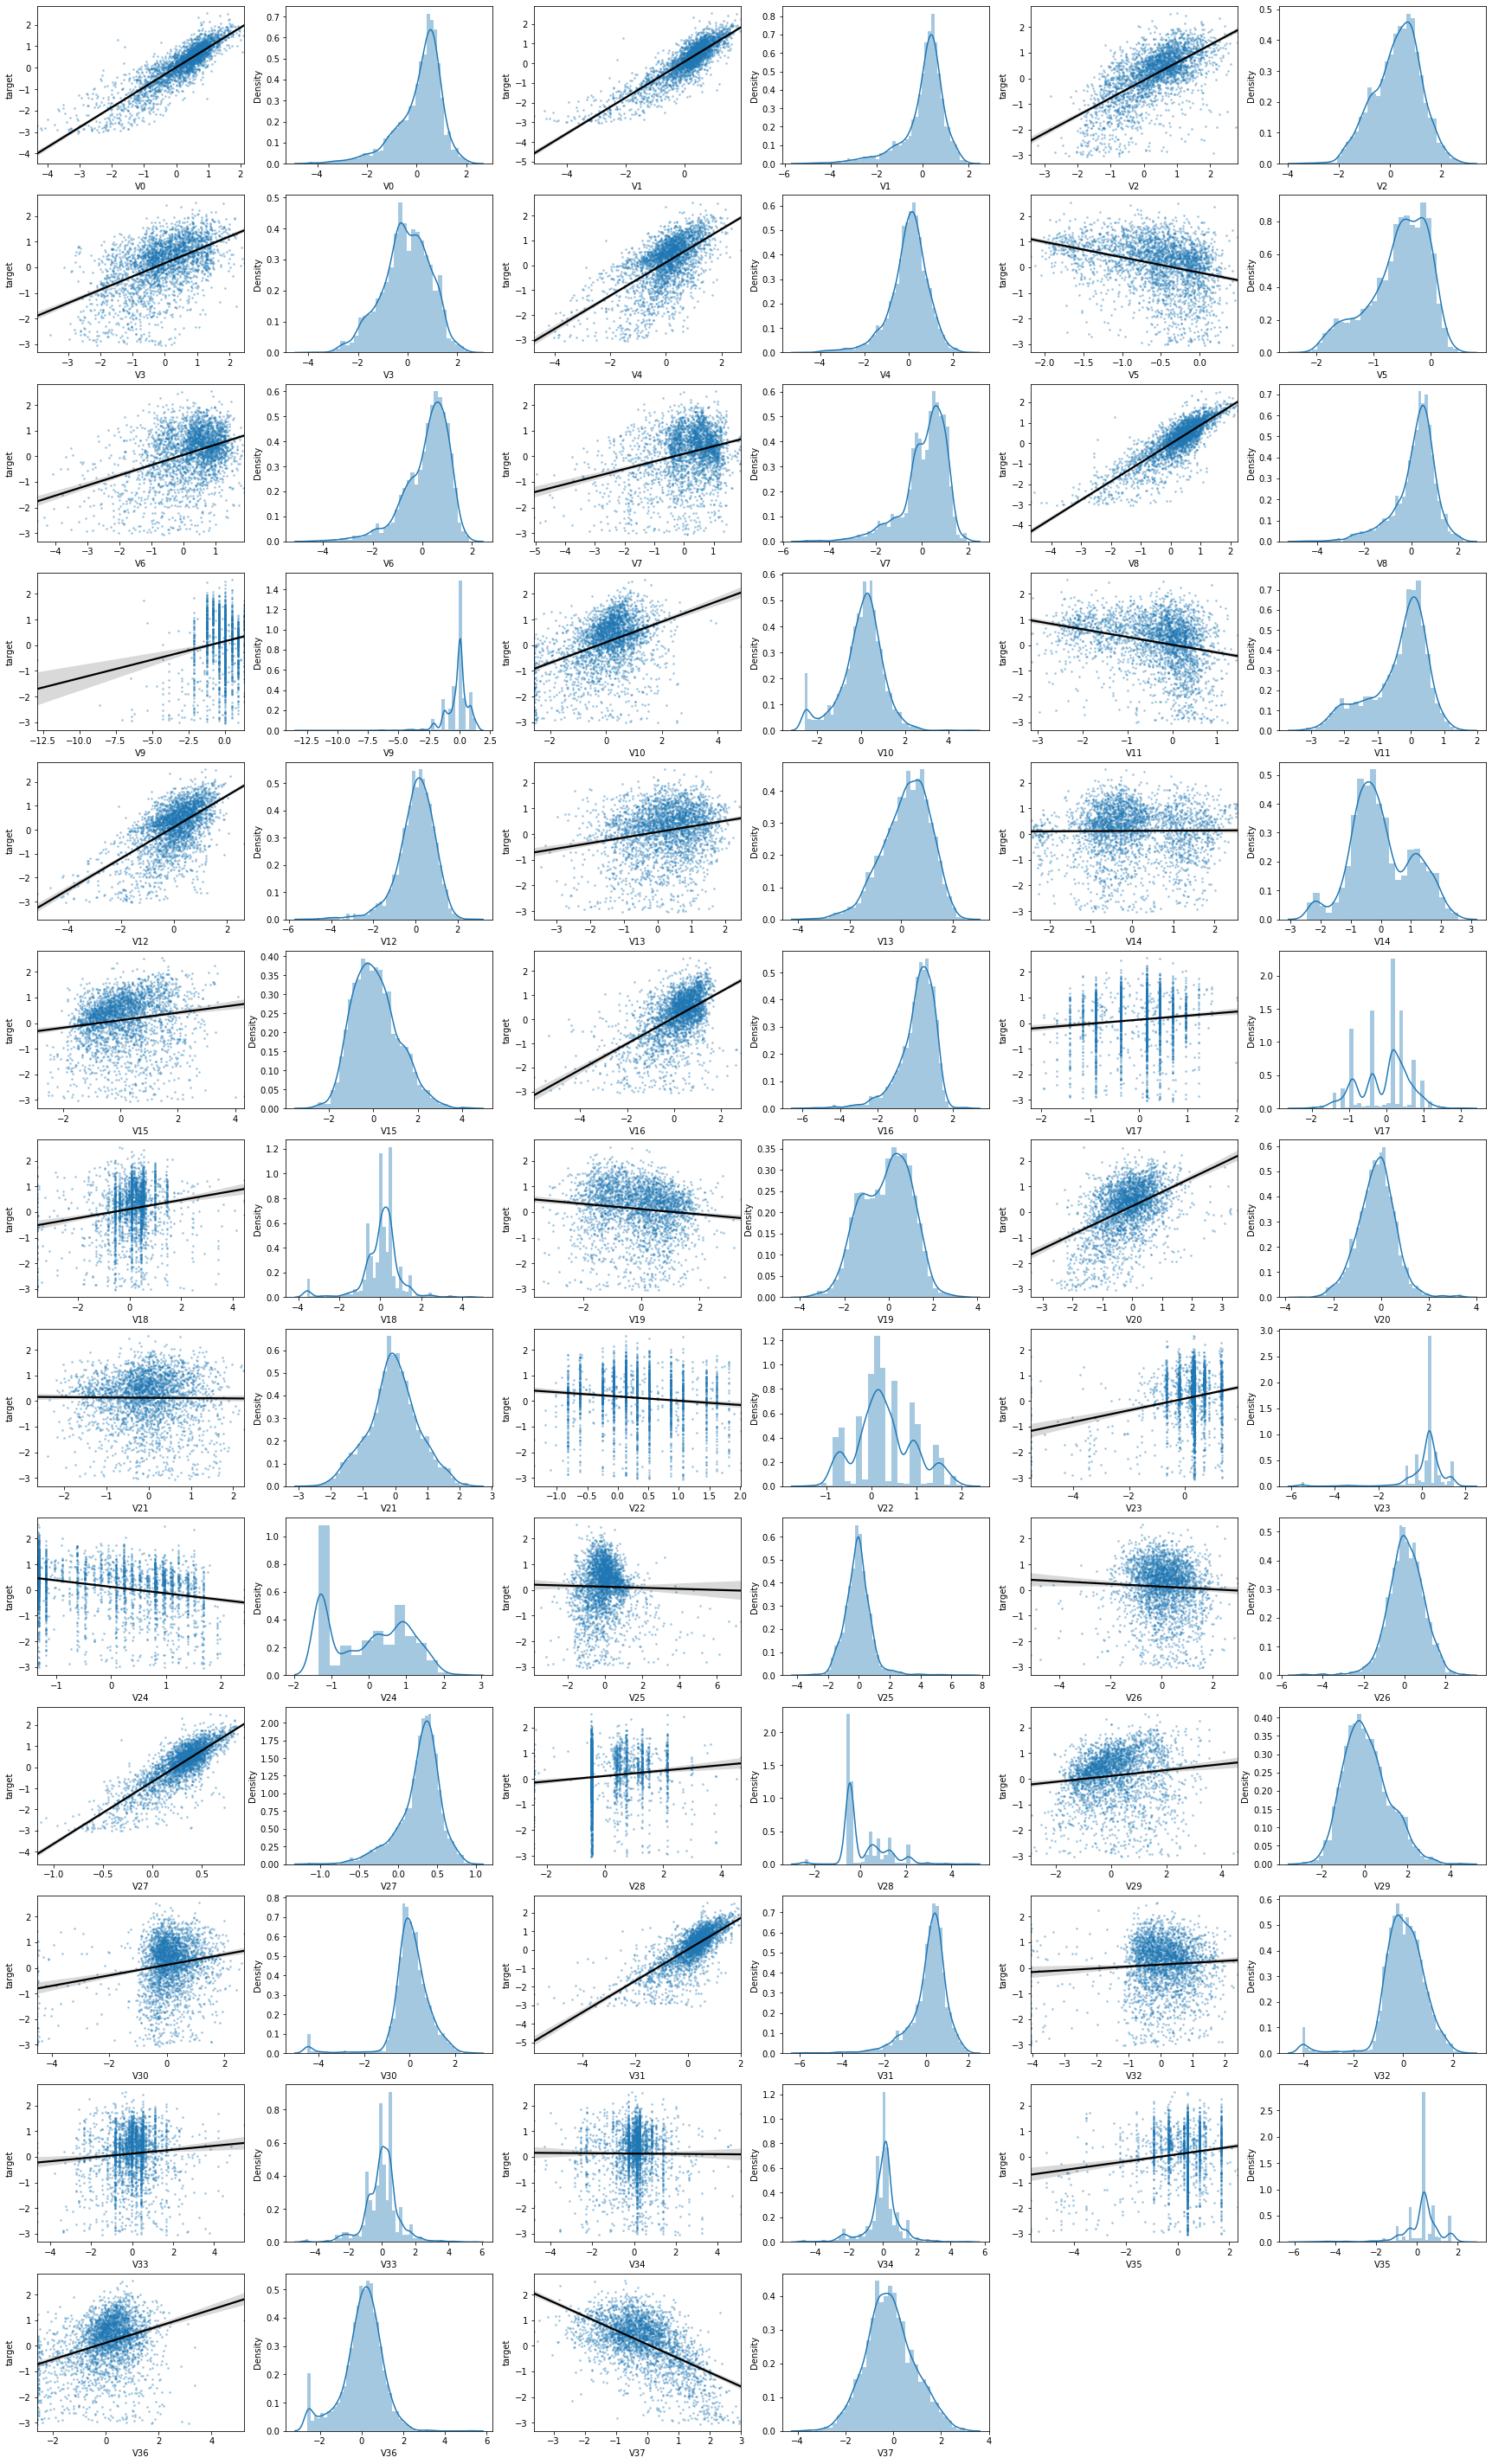

In [36]:
fcols = 6
frows = len(test_data.columns)
plt.figure(figsize=(5*fcols, 4 * frows))

i = 0
for col in test_data.columns:
    i += 1
    ax = plt.subplot(frows, fcols, i)
    sns.regplot(x=col, y='target', data=train_data, ax=ax, scatter_kws={'marker':'.', 's':3, 'alpha':0.3}, line_kws={'color':'k'})
    plt.xlabel(col)
    plt.ylabel('target')
    
    i+= 1
    ax = plt.subplot(frows, fcols, i)
    sns.distplot(train_data[col].dropna())
    plt.xlabel(col)

In [37]:
pd.set_option('display.max_columns', 10)
pd.set_option('display.max_rows', 10)
data_train1 = train_data.drop(['V5', 'V9', 'V11', 'V17', 'V22', 'V28'], axis=1)
train_corr = data_train1.corr()
train_corr

V0        V1        V2        V3        V4  ...       V34  \
V0      1.000000  0.908607  0.463643  0.409576  0.781212  ... -0.019342   
V1      0.908607  1.000000  0.506514  0.383924  0.657790  ... -0.029115   
V2      0.463643  0.506514  1.000000  0.410148  0.057697  ... -0.025620   
V3      0.409576  0.383924  0.410148  1.000000  0.315046  ... -0.031898   
V4      0.781212  0.657790  0.057697  0.315046  1.000000  ...  0.028659   
...          ...       ...       ...       ...       ...  ...       ...   
V34    -0.019342 -0.029115 -0.025620 -0.031898  0.028659  ...  1.000000   
V35     0.138933  0.146329  0.043648  0.080034  0.100010  ...  0.233616   
V36     0.231417  0.235299  0.316462  0.324475  0.113609  ... -0.019032   
V37    -0.494076 -0.494043 -0.734956 -0.229613 -0.031054  ... -0.006854   
target  0.873212  0.871846  0.638878  0.512074  0.603984  ... -0.006034   

             V35       V36       V37    target  
V0      0.138933  0.231417 -0.494076  0.873212  
V1      0.146329  0.235299 -0.494043  0.871846  
V2      0.043648  0.316462 -0.734956  0.638878  
V3      0.080034  0.324475 -0.229613  0.512074  
V4      0.100010  0.113609 -0.031054  0.603984  
...          ...       ...       ...       ...  
V34     0.233616 -0.019032 -0.006854 -0.006034  
V35     1.000000  0.025401 -0.077991  0.140294  
V36     0.025401  1.000000 -0.039478  0.319309  
V37    -0.077991 -0.039478  1.000000 -0.565795  
target  0.140294  0.319309 -0.565795  1.000000  

[33 rows x 33 columns]

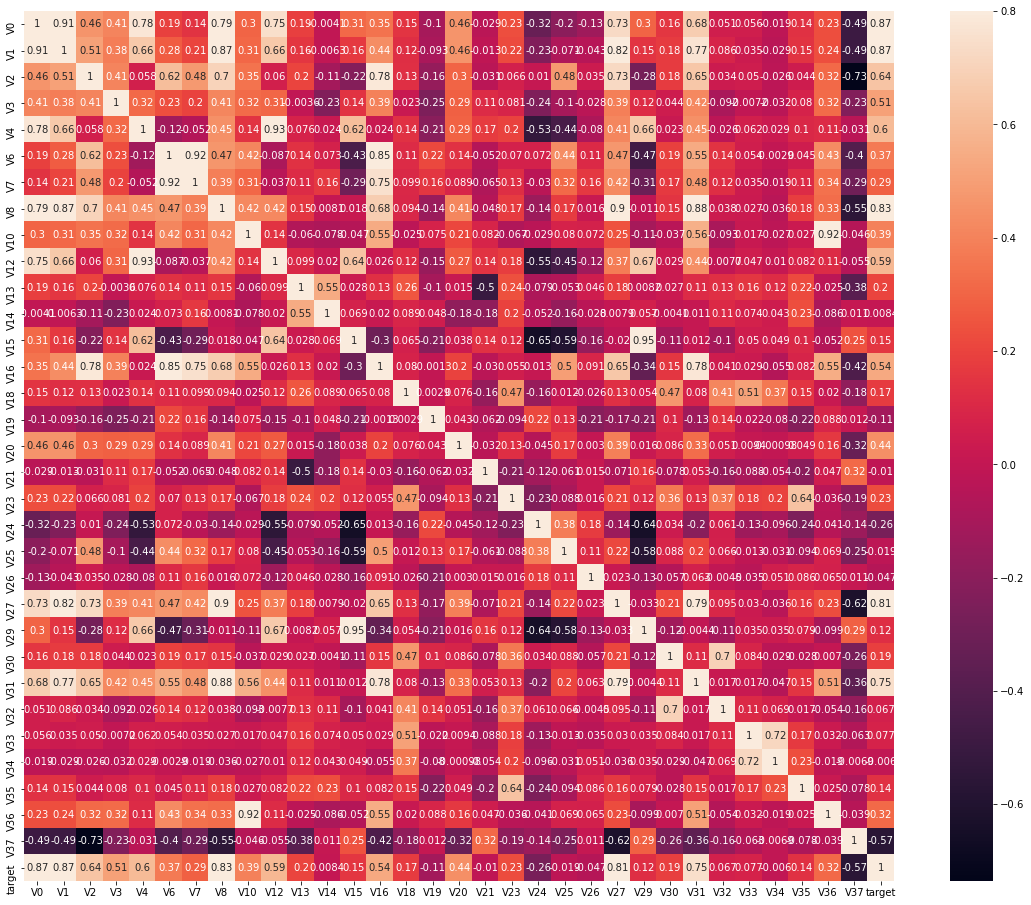

In [38]:
ax = plt.subplots(figsize=(20, 16))
ax = sns.heatmap(train_corr, vmax=0.8, square=True, annot=True)
annot=True

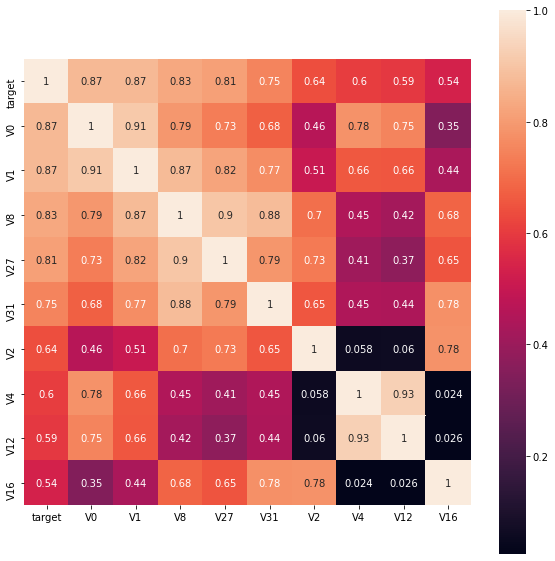

In [39]:
k = 10
cols = train_corr.nlargest(k, 'target')['target'].index
cm = np.corrcoef(train_data[cols].values.T)
hm = plt.subplots(figsize=(10, 10))
hm = sns.heatmap(train_data[cols].corr(), annot=True, square=True)
plt.show()

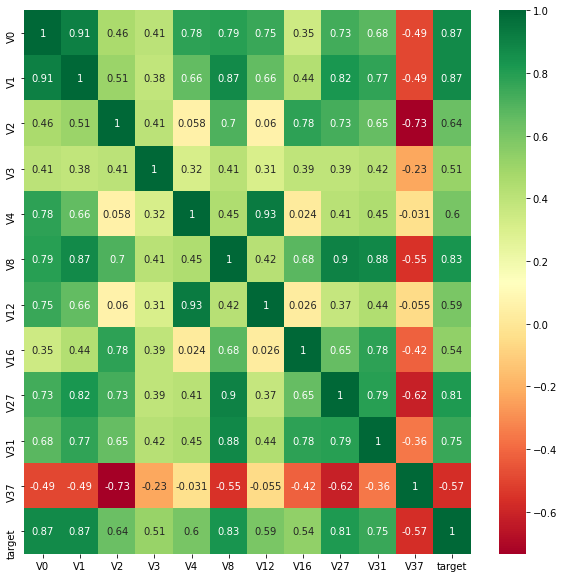

In [42]:
threshold = 0.5
corrmat = train_data.corr()
top_corr_features = corrmat.index[abs(corrmat["target"]) > threshold]
plt.figure(figsize=(10,10))
g = sns.heatmap(train_data[top_corr_features].corr(), annot=True, cmap='RdYlGn')

In [43]:
threshold = 0.5
# 相关系数矩阵
corr_matrix = data_train1.corr().abs()
drop_col = corr_matrix[corr_matrix["target"] < threshold].index
# data_all.drop(drop_col, axis=1, inplace=True)

In [44]:
# Box-Cox 变换
drop_columns = ['V5', 'V9', 'V11', 'V17', 'V22', 'V28']
train_x = train_data.drop(['target'], axis=1)
data_all = pd.concat([train_x, test_data])
data_all.drop(drop_columns, axis=1, inplace=True)
data_all.head()

V0     V1     V2     V3     V4  ...    V33    V34    V35    V36    V37
0  0.566  0.016 -0.143  0.407  0.452  ... -4.627 -4.789 -5.101 -2.608 -3.508
1  0.968  0.437  0.066  0.566  0.194  ... -0.843  0.160  0.364 -0.335 -0.730
2  1.013  0.568  0.235  0.370  0.112  ... -0.843  0.160  0.364  0.765 -0.589
3  0.733  0.368  0.283  0.165  0.599  ... -0.843 -0.065  0.364  0.333 -0.112
4  0.684  0.638  0.260  0.209  0.337  ... -0.843 -0.215  0.364 -0.280 -0.028

[5 rows x 32 columns]

In [46]:
cols_numeric = list(data_all.columns)
def scale_minmax(col):
    return (col - col.min())/(col.max() - col.min())
data_all[cols_numeric] = data_all[cols_numeric].apply(scale_minmax, axis=0)
data_all[cols_numeric].describe()

V0           V1           V2           V3           V4  ...  \
count  4813.000000  4813.000000  4813.000000  4813.000000  4813.000000  ...   
mean      0.694172     0.721357     0.602300     0.603139     0.523743  ...   
std       0.144198     0.131443     0.140628     0.152462     0.106430  ...   
min       0.000000     0.000000     0.000000     0.000000     0.000000  ...   
25%       0.626676     0.679416     0.514414     0.503888     0.478182  ...   
50%       0.729488     0.752497     0.617072     0.614270     0.535866  ...   
75%       0.790195     0.799553     0.700464     0.710474     0.585036  ...   
max       1.000000     1.000000     1.000000     1.000000     1.000000  ...   

               V33          V34          V35          V36          V37  
count  4813.000000  4813.000000  4813.000000  4813.000000  4813.000000  
mean      0.458493     0.483790     0.762873     0.332385     0.545795  
std       0.099095     0.101020     0.102037     0.127456     0.150356  
min       0.000000     0.000000     0.000000     0.000000     0.000000  
25%       0.409037     0.454490     0.727273     0.270584     0.445647  
50%       0.454518     0.499949     0.800020     0.347056     0.539317  
75%       0.500000     0.511365     0.800020     0.414861     0.643061  
max       1.000000     1.000000     1.000000     1.000000     1.000000  

[8 rows x 32 columns]

In [70]:
train_data_process = train_data[cols_numeric]
train_data_process = train_data_process[cols_numeric].apply(scale_minmax, axis=0)
test_data_process = test_data[cols_numeric]
test_data_process = test_data_process[cols_numeric].apply(scale_minmax, axis=0)

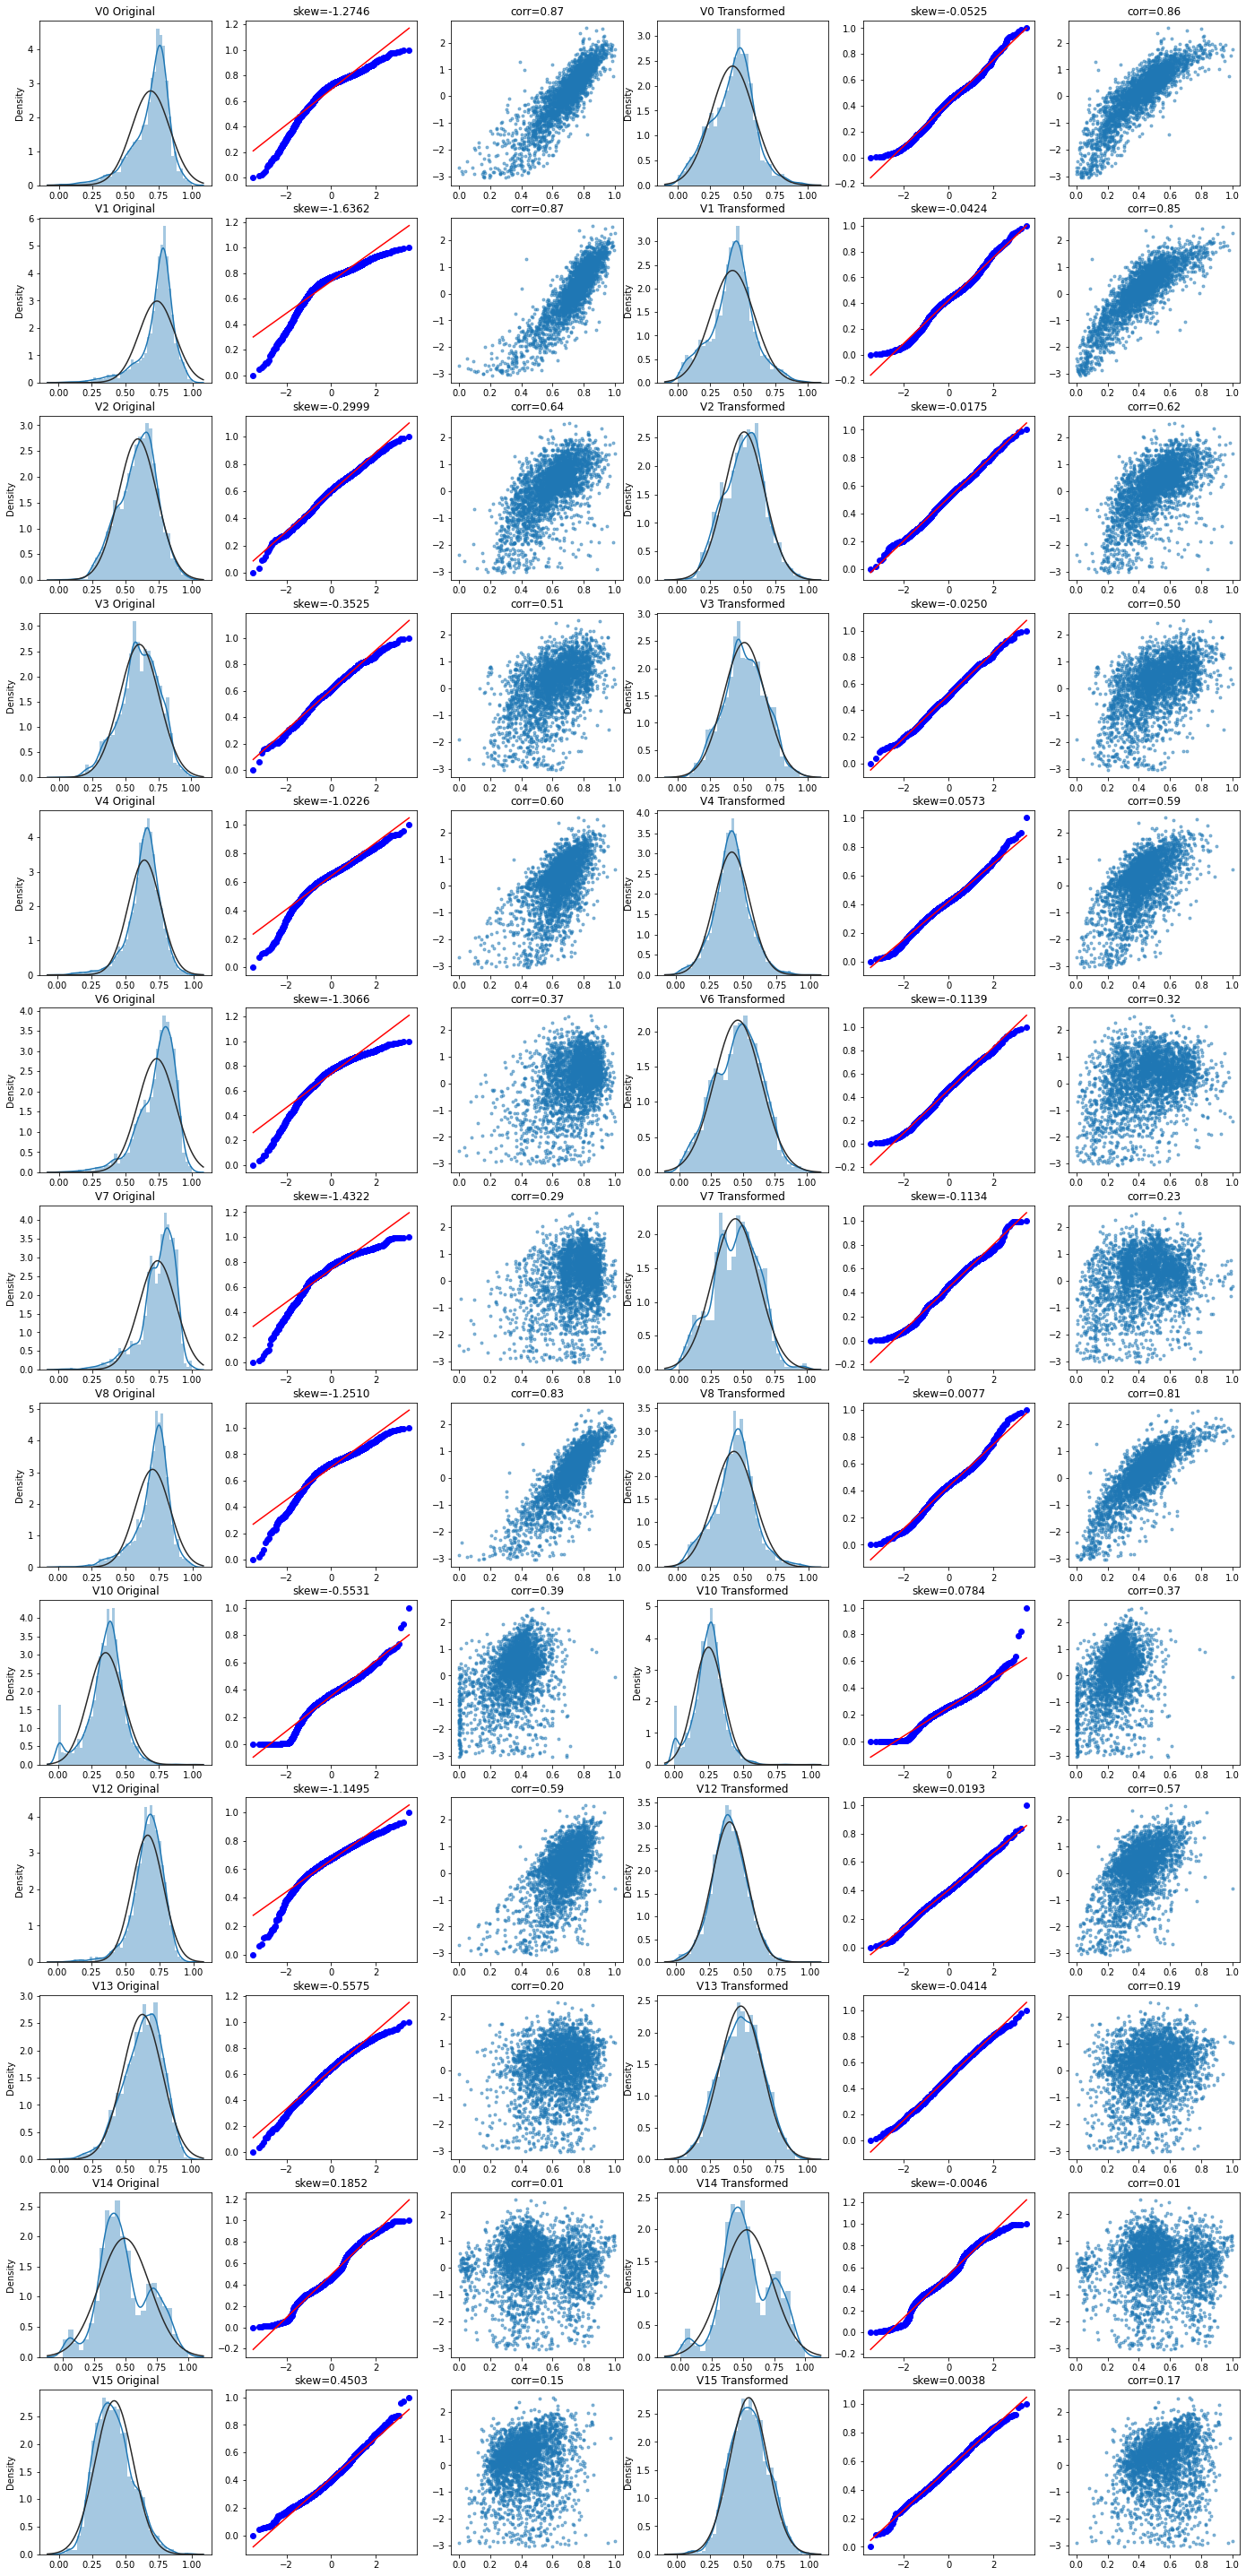

In [71]:
cols_numeric_left = cols_numeric[0:13]
cols_numeric_right = cols_numeric[13:]
train_data_process = pd.concat([train_data_process, train_data['target']], axis=1)

fcols = 6
frows = len(cols_numeric_left)
plt.figure(figsize=(4*fcols, 4 * frows))
i = 0

for var in cols_numeric_left:
    data = train_data_process[[var, 'target']].dropna()
    i += 1
    plt.subplot(frows, fcols, i)
    sns.distplot(data[var], fit=stats.norm)
    plt.title(var + ' Original')
    plt.xlabel('')
    
    i += 1
    plt.subplot(frows, fcols, i)
    _ = stats.probplot(data[var], plot=plt)
    plt.title('skew=' + '{:.4f}'.format(stats.skew(data[var])))
    plt.xlabel('')
    plt.ylabel('')
    
    i += 1
    plt.subplot(frows, fcols, i)
    plt.plot(data[var], data['target'], '.', alpha=0.5)
    plt.title('corr=' + '{:.2f}'.format(np.corrcoef(data[var], data['target'])[0][1]))
    
    i += 1
    plt.subplot(frows, fcols, i)
    trans_var, lambda_var = stats.boxcox(data[var].dropna() + 1)
    trans_var = scale_minmax(trans_var)
    sns.distplot(trans_var, fit=stats.norm)
    plt.title(var + ' Transformed')
    plt.xlabel('')
    
    i += 1
    plt.subplot(frows, fcols, i)
    _ = stats.probplot(trans_var, plot=plt)
    plt.title('skew=' + '{:.4f}'.format(stats.skew(trans_var)))
    plt.xlabel('')
    plt.ylabel('')
    
    i += 1
    plt.subplot(frows, fcols, i)
    plt.plot(trans_var, data['target'], '.', alpha=0.5)
    plt.title('corr={:.2f}'.format(np.corrcoef(trans_var, data['target'])[0][1]))

V0        V1        V2        V3        V4  ...  target  target  \
0     0.759139  0.729830  0.524488  0.680337  0.698964  ...   0.175   0.175   
1     0.821406  0.789631  0.557939  0.705130  0.664244  ...   0.676   0.676   
2     0.828377  0.808239  0.584987  0.674567  0.653210  ...   0.633   0.633   
3     0.785006  0.779830  0.592670  0.642601  0.718746  ...   0.206   0.206   
4     0.777416  0.818182  0.588988  0.649462  0.683488  ...   0.384   0.384   
...        ...       ...       ...       ...       ...  ...     ...     ...   
2883  0.700898  0.724006  0.525288  0.641977  0.718880  ...   0.235   0.235   
2884  0.750000  0.806676  0.594750  0.645408  0.709460  ...   1.042   1.042   
2885  0.610440  0.625142  0.469750  0.629970  0.656439  ...   0.005   0.005   
2886  0.637546  0.687500  0.492318  0.609231  0.698560  ...   0.350   0.350   
2887  0.728470  0.781534  0.511364  0.609231  0.689140  ...   0.417   0.417   

      target  target  target  
0      0.175   0.175   0.175  
1      0.676   0.676   0.676  
2      0.633   0.633   0.633  
3      0.206   0.206   0.206  
4      0.384   0.384   0.384  
...      ...     ...     ...  
2883   0.235   0.235   0.235  
2884   1.042   1.042   1.042  
2885   0.005   0.005   0.005  
2886   0.350   0.350   0.350  
2887   0.417   0.417   0.417  

[2888 rows x 38 columns]

In [98]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

features_columns = [col for col in train_data.columns if col not in ['target']]
min_max_scaler = MinMaxScaler()
min_max_scaler = min_max_scaler.fit(train_data[features_columns])

train_data_scaler = min_max_scaler.transform(train_data[features_columns])
test_data_scaler = min_max_scaler.transform(test_data[features_columns])

train_data_scaler = pd.DataFrame(train_data_scaler)
train_data_scaler.columns = features_columns
test_data_scaler = pd.DataFrame(test_data_scaler)
test_data_scaler.columns = features_columns
train_data_scaler['target'] = train_data['target']

display(train_data_scaler.describe())
display(test_data_scaler.describe())

new_numerical =['V0', 'V2', 'V3', 'V4', 'V5', 'V6', 'V10', 'V11', 'V13', 'V15', 'V16', 'V18', 'V19', 'V20', 'V22', 'V24', 'V30', 'V31', 'V37']
X = np.matrix(train_data_scaler[new_numerical])
VIF_list = [variance_inflation_factor(X, i) for i in range(X.shape[1])]
print(VIF_list)



V0           V1           V2           V3           V4  ...  \
count  2886.000000  2886.000000  2886.000000  2886.000000  2886.000000  ...   
mean      0.690633     0.735633     0.593844     0.606212     0.639787  ...   
std       0.143740     0.133703     0.145844     0.151311     0.119504  ...   
min       0.000000     0.000000     0.000000     0.000000     0.000000  ...   
25%       0.626239     0.695703     0.497759     0.515087     0.586328  ...   
50%       0.727153     0.766335     0.609155     0.609855     0.652873  ...   
75%       0.783922     0.812642     0.694422     0.714096     0.712152  ...   
max       1.000000     1.000000     1.000000     1.000000     1.000000  ...   

               V34          V35          V36          V37       target  
count  2886.000000  2886.000000  2886.000000  2886.000000  2884.000000  
mean      0.484489     0.734944     0.336235     0.527608     0.127274  
std       0.101365     0.122840     0.123663     0.153192     0.983462  
min       0.000000     0.000000     0.000000     0.000000    -3.044000  
25%       0.454490     0.685279     0.279792     0.427036    -0.348500  
50%       0.499949     0.755580     0.349860     0.519457     0.313000  
75%       0.511365     0.785260     0.414447     0.621870     0.794250  
max       1.000000     1.000000     1.000000     1.000000     2.538000  

[8 rows x 39 columns]

V0           V1           V2           V3           V4  ...  \
count  1925.000000  1925.000000  1925.000000  1925.000000  1925.000000  ...   
mean      0.642905     0.715637     0.477791     0.632726     0.635558  ...   
std       0.166253     0.152936     0.155176     0.161379     0.154392  ...   
min      -0.074195    -0.051989    -0.138124     0.106035    -0.024088  ...   
25%       0.568618     0.663494     0.390845     0.516451     0.571256  ...   
50%       0.681537     0.755256     0.504641     0.651177     0.654017  ...   
75%       0.756506     0.811222     0.591869     0.740527     0.720226  ...   
max       0.996747     1.028693     0.858835     1.022766     1.240345  ...   

               V33          V34          V35          V36          V37  
count  1925.000000  1925.000000  1925.000000  1925.000000  1925.000000  
mean      0.457349     0.482778     0.673164     0.326501     0.577034  
std       0.098071     0.100537     0.118082     0.132661     0.141870  
min       0.000000     0.000000    -0.222222     0.000000     0.042836  
25%       0.412901     0.454490     0.666667     0.256819     0.482353  
50%       0.454518     0.499949     0.676518     0.342977     0.570437  
75%       0.500000     0.511365     0.755580     0.415371     0.667722  
max       1.000000     1.000000     0.918568     0.697043     1.003167  

[8 rows x 38 columns]

[216.73387180903222, 114.38118723828812, 27.863778129686356, 201.96436579080174, 78.93722825798903, 151.06983667656212, 14.519604941508451, 82.69750284665385, 28.479378440614585, 27.759176471505945, 526.6483470743831, 23.50166642638334, 19.920315849901424, 24.640481765008683, 11.816055964845381, 4.958208708452915, 37.09877416736591, 298.26442986612767, 47.854002539887034]


In [99]:
from sklearn.decomposition import PCA

pca = PCA(n_components=0.9)
new_train_pca_90 = pca.fit_transform(train_data_scaler.iloc[:, 0:-1])
new_test_pca_90 = pca.transform(test_data_scaler)
new_train_pca_90 = pd.DataFrame(new_train_pca_90)
new_test_pca_90 = pd.DataFrame(new_test_pca_90)
new_train_pca_90['target'] = train_data_scaler['target']
new_train_pca_90.describe()

0             1             2             3             4  \
count  2.886000e+03  2.886000e+03  2.886000e+03  2.886000e+03  2.886000e+03   
mean   3.833583e-17 -2.107154e-16  3.512244e-17  3.502627e-17  4.577843e-17   
std    3.998976e-01  3.500240e-01  2.938631e-01  2.728023e-01  2.077128e-01   
min   -1.071795e+00 -9.429479e-01 -9.948314e-01 -7.103087e-01 -7.703987e-01   
25%   -2.804085e-01 -2.613727e-01 -2.090797e-01 -1.945196e-01 -1.315620e-01   
50%   -1.417104e-02 -1.277241e-02  2.112166e-02 -2.337401e-02 -5.122797e-03   
75%    2.287306e-01  2.317720e-01  2.069571e-01  1.657590e-01  1.281660e-01   
max    1.597730e+00  1.382802e+00  1.010250e+00  1.448007e+00  1.034061e+00   

       ...            12            13            14            15  \
count  ...  2.886000e+03  2.886000e+03  2.886000e+03  2.886000e+03   
mean   ... -1.877781e-17 -6.439755e-17 -3.261052e-17  1.316911e-16   
std    ...  1.193301e-01  1.149758e-01  1.133507e-01  1.019259e-01   
min    ... -4.175153e-01 -4.310613e-01 -4.170535e-01 -3.601627e-01   
25%    ... -7.139961e-02 -7.474073e-02 -7.709743e-02 -6.603914e-02   
50%    ... -4.140670e-03  1.054915e-03 -1.758387e-03 -7.533392e-04   
75%    ...  6.786199e-02  7.574868e-02  7.116829e-02  6.357449e-02   
max    ...  5.156118e-01  4.978126e-01  4.673189e-01  4.570870e-01   

            target  
count  2884.000000  
mean      0.127274  
std       0.983462  
min      -3.044000  
25%      -0.348500  
50%       0.313000  
75%       0.794250  
max       2.538000  

[8 rows x 17 columns]

In [102]:
pca = PCA(n_components=16)
new_train_pca_16 = pca.fit_transform(train_data_scaler.iloc[:, 0:-1])
new_test_pca_16 = pca.transform(test_data_scaler)
new_train_pca_16 = pd.DataFrame(new_train_pca_16)
new_test_pca_16 = pd.DataFrame(new_test_pca_16)
new_train_pca_16['target'] = train_data_scaler['target']
new_train_pca_16.describe()

0             1             2             3             4  \
count  2.886000e+03  2.886000e+03  2.886000e+03  2.886000e+03  2.886000e+03   
mean  -1.442742e-16 -1.046845e-16  1.135805e-17 -1.149654e-16  3.750753e-17   
std    3.998976e-01  3.500240e-01  2.938631e-01  2.728023e-01  2.077128e-01   
min   -1.071795e+00 -9.429479e-01 -9.948315e-01 -7.103090e-01 -7.703992e-01   
25%   -2.804085e-01 -2.613727e-01 -2.090797e-01 -1.945194e-01 -1.315615e-01   
50%   -1.417104e-02 -1.277241e-02  2.112169e-02 -2.337399e-02 -5.122823e-03   
75%    2.287306e-01  2.317720e-01  2.069571e-01  1.657589e-01  1.281661e-01   
max    1.597730e+00  1.382802e+00  1.010250e+00  1.448007e+00  1.034060e+00   

       ...            12            13            14            15  \
count  ...  2.886000e+03  2.886000e+03  2.886000e+03  2.886000e+03   
mean   ... -9.309562e-18 -3.484835e-17  2.861753e-18  1.206655e-16   
std    ...  1.193301e-01  1.149757e-01  1.133506e-01  1.019253e-01   
min    ... -4.175216e-01 -4.314085e-01 -4.170972e-01 -3.606917e-01   
25%    ... -7.139453e-02 -7.472522e-02 -7.706669e-02 -6.605002e-02   
50%    ... -4.139326e-03  1.123963e-03 -1.647178e-03 -7.380870e-04   
75%    ...  6.787543e-02  7.581087e-02  7.124433e-02  6.347248e-02   
max    ...  5.155782e-01  4.978937e-01  4.672302e-01  4.566952e-01   

            target  
count  2884.000000  
mean      0.127274  
std       0.983462  
min      -3.044000  
25%      -0.348500  
50%       0.313000  
75%       0.794250  
max       2.538000  

[8 rows x 17 columns]

In [106]:
## 模型训练
from sklearn.model_selection import train_test_split

new_train_pca_16 = new_train_pca_16.fillna(0)
train = new_train_pca_16[new_test_pca_16.columns]
target = new_train_pca_16['target']

train_data, test_data, train_target, test_target = train_test_split(train, target, test_size=0.2, random_state=0)


In [108]:
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression

clf = LinearRegression()
clf.fit(train_data, train_target)
test_pred = clf.predict(test_data)
score = mean_squared_error(test_target, clf.predict(test_data))
print ("LinearRegression mean squared error:", score)

LinearRegression mean squared error: 0.27168055027492377


In [113]:
from sklearn.neighbors import KNeighborsRegressor

clf = KNeighborsRegressor(n_neighbors=3)
clf.fit(train_data, train_target)
test_pred = clf.predict(test_data)
score = mean_squared_error(test_target, test_pred)
print("KNeighborsRegressor mean squared error:", score)

KNeighborsRegressor mean squared error: 0.26758239023452524


In [114]:
from sklearn.tree import DecisionTreeRegressor

clf = DecisionTreeRegressor()
clf.fit(train_data, train_target)
test_pred = clf.predict(test_data)
score = mean_squared_error(test_target, clf.predict(test_data))
print("DecisionTreeRegressor mean squared error:", score)

DecisionTreeRegressor mean squared error: 0.6082462197231835


In [116]:
from sklearn.ensemble import RandomForestRegressor

clf = RandomForestRegressor(n_estimators=200)
clf.fit(train_data, train_target)
test_pred = clf.predict(test_data)
score = mean_squared_error(test_target, test_pred)
print("RandomForestRegressor mean squared error:", score)

RandomForestRegressor mean squared error: 0.24863542764697227


In [122]:
from sklearn.linear_model import SGDRegressor
clf = SGDRegressor(max_iter=500, tol=1e-2)
clf.fit(train_data, train_target)
score_train = mean_squared_error(train_target, clf.predict(train_data))
score_test = mean_squared_error(test_target, clf.predict(test_data))
print("SGDRegressor train MSE:", score_train)
print("SGDRegressor test MSE:", score_test)

SGDRegressor train MSE: 0.35953738247700656
SGDRegressor test MSE: 0.28072552415655433


In [126]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(5)
train_data_poly = poly.fit_transform(train_data)
test_data_poly = poly.transform(test_data)
clf = SGDRegressor(max_iter=1000, tol=1e-3)
clf.fit(train_data_poly, train_target)
score_train = mean_squared_error(train_target, clf.predict(train_data_poly))
score_test = mean_squared_error(test_target, clf.predict(test_data_poly))
print("PolynomialFeatures train MSE:", score_train)
print("PolynomialFeatures test MSE:", score_test)

PolynomialFeatures train MSE: 0.29325813673572315
PolynomialFeatures test MSE: 0.259051500199025


In [127]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor as RFG

rfg = RFG()
parameters = {'n_estimators':[50, 100, 200], 'max_depth': [1, 2, 3]}
clf = GridSearchCV(rfg, parameters, cv=5)
clf.fit(train_data, train_target)
score_rfg = mean_squared_error(test_target, clf.predict(test_data))
print("RandomForestRegressor GridSearchCV test MSE:", score_rfg)
sorted(clf.cv_results_.keys())

RandomForestRegressor GridSearchCV test MSE: 0.35970166544510634


['mean_fit_time',
 'mean_score_time',
 'mean_test_score',
 'param_max_depth',
 'param_n_estimators',
 'params',
 'rank_test_score',
 'split0_test_score',
 'split1_test_score',
 'split2_test_score',
 'split3_test_score',
 'split4_test_score',
 'std_fit_time',
 'std_score_time',
 'std_test_score']

<module 'matplotlib.pyplot' from '/opt/anaconda3/lib/python3.8/site-packages/matplotlib/pyplot.py'>

<Figure size 2700x1500 with 0 Axes>

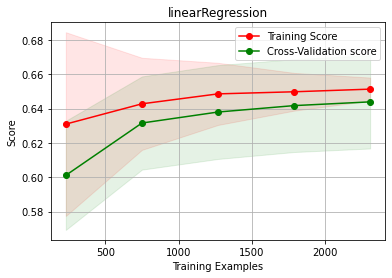

In [135]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import learning_curve

plt.figure(figsize=(18, 10), dpi=150)
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None, n_jobs=1, train_sizes=np.linspace(.1, 1.0, 5)):
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training Examples")
    plt.ylabel("Score")
    
    train_sizes, train_scores, test_scores = learning_curve(estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()
    
    plt.fill_between(train_sizes, 
                    train_scores_mean - train_scores_std, 
                    train_scores_mean + train_scores_std,
                    alpha=0.1, color='r')
    plt.fill_between(train_sizes,
                    test_scores_mean - test_scores_std,
                    test_scores_mean + test_scores_std,
                    alpha=0.1, color='g')
    plt.plot(train_sizes, train_scores_mean, 'o-', color='r', label="Training Score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color='g', label="Cross-Validation score")
    plt.legend(loc="best")
    return plt
    
title = "linearRegression"
cv = ShuffleSplit(n_splits=100, test_size=0.2, random_state=0)
estimator = SGDRegressor()
plot_learning_curve(estimator, title, train.values, target.values, ylim=None, cv=cv, n_jobs=-1)
    

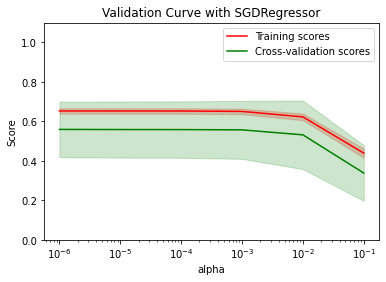

In [139]:
from sklearn.model_selection import validation_curve
param_range = [0.1, 0.01, 0.001, 0.0001, 0.00001, 0.000001]
train_scores, test_scores = validation_curve(SGDRegressor(max_iter=1000, tol=1e-3, penalty='L1'), train.values, target.values, 
                                             param_name='alpha', param_range=param_range, cv=10, scoring='r2', n_jobs=1)
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

plt.title('Validation Curve with SGDRegressor')
plt.xlabel('alpha')
plt.ylabel('Score')
plt.ylim(0, 1.1)
plt.semilogx(param_range, train_scores_mean, label='Training scores', color='r')
plt.fill_between(param_range, 
                    train_scores_mean - train_scores_std, 
                    train_scores_mean + train_scores_std,
                    alpha=0.2, color='r')
plt.semilogx(param_range, test_scores_mean, label='Cross-validation scores', color='g')
plt.fill_between(param_range,
                test_scores_mean - test_scores_std,
                test_scores_mean + test_scores_std,
                alpha=0.2, color='g')
plt.legend(loc='best')
plt.show()

In [6]:
import pandas as pd
train_data_file = "./zhengqi_train.txt"
test_data_file = "./zhengqi_test.txt"

train_data = pd.read_csv(train_data_file, sep='\t', encoding='utf-8')
test_data = pd.read_csv(test_data_file, sep='\t', encoding='utf-8')

epsilon = 1e-5
func_dict = {
    'add': lambda x, y: x + y,
    'mins': lambda x, y: x - y,
    'div': lambda x, y: x/(y + epsilon),
    'multi': lambda x, y: x * y,
}

def auto_feature_make(train_data, test_data, func_dict, col_list):
    train_data, test_data = train_data.copy(), test_data.copy()
    for i in col_list:
        for j in col_list:
            for func_name, func in func_dict.items():
                for data in [train_data, test_data]:
                    func_feature = func(data[i], data[j])
                    col_func_feature = '-'.join([i, func_name, j])
                    data[col_func_feature] = func_feature
    return train_data, test_data

train_data2, test_data2 = auto_feature_make(train_data, test_data, func_dict, col_list=test_data.columns)

print (train_data.shape)
print(train_data2.shape)

(2888, 39)
(2888, 5815)


In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=500)
train